# TP1 - PEIA - CEIA
>Autor: **TEICH Juan Ignacio**

## Ejercicio 1
**Enunciado**. De 10 monedas hay 1 monedas falsas, que tienen probabilidad 0,2 de mostrar cara al ser lanzadas. Si se toma
una moneda al azar, se lanza 12 veces, y en todas ellas se obtiene cara, ¿qué es más probable, que la moneda elegida sea
justa o que esté cargada? Dar las probabilidades tanto de que la moneda elegida sea falsa, como de que sea justa.

**Resolución**.<br>
Para poder determinar si es más probable que la moneda elegida sea justa o falsa dado que se lanzó 12 veces y en todas las veces se obtuvo cara, se debe calcular la probabilidad condicional de que la moneda sea falsa (o justa) dado que saco 12 veces seguidas cara, en notación matemática:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguidas cara}).
$$
Para poder calcular esto recurrimos al Teorema de Bayes, que nos dice:
$$
P(B_j/A) = \frac{P(A/B_j)\,P(B_j)}{\sum_i P(A/B_i)\cdot P(B_i)},
$$
llevado a nuestro problema:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{sale 12 veces seguida cara}/\text{moneda falsa})\,P(\text{moneda falsa})}{P(\text{sale 12 veces seguida cara}/\text{moneda falsa})\,P(\text{moneda falsa}) + P(\text{sale 12 veces seguida cara}/\text{moneda justa})\,P(\text{moneda justa})}.
$$
Sabemos que:
$$
P(\text{moneda falsa}) = \frac{1}{10} \quad\quad P(\text{moneda justa}) = \frac{9}{10},
$$
y considerando que cada tirada de moneda es un experimento donde las tiradas son independientes entre sí, es decir, el resultado de la tirada $i$ no afecta el de la tirada $i+1$:
$$
P(\text{sale 12 veces seguida cara}/\text{moneda falsa}) = P(\text{cara}/\text{moneda falsa})^{12} \quad\quad P(\text{sale 12 veces seguida cara}/\text{moneda justa}) = P(\text{cara}/\text{moneda justa})^{12},
$$
siendo por enunciado:
$$
P(\text{cara}/\text{moneda falsa}) = 0.20 \quad\quad P(\text{cara}/\text{moneda falsa}) = 0.50.
$$
Juntando el desarrollo tenemos:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa})}{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa}) + P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}.
$$
Análogamente para saber la probabilidad de que sea justa dado que sale 12 veces seguida cara:
$$
P(\text{moneda justa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa}) + P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}.
$$

A continuación se calculan estas probabilidades utilizando python:

In [1]:
P_falsa = 1/10
P_justa = 1/10
P_cara_falsa = 0.20
P_cara_justa = 0.50

P_falsa_12caras = (P_cara_falsa**12 * P_falsa) / (P_cara_falsa**12 * P_falsa + P_cara_justa**12 * P_justa)
P_justa_12caras = (P_cara_justa**12 * P_justa) / (P_cara_falsa**12 * P_falsa + P_cara_justa**12 * P_justa)

print(f"La probabilidad de que la moneda sea FALSA dado que sale 12 veces seguidas cara es {P_falsa_12caras}")
print(f"La probabilidad de que la moneda sea JUSTA dado que sale 12 veces seguidas cara es {P_justa_12caras}")


La probabilidad de que la moneda sea FALSA dado que sale 12 veces seguidas cara es 1.6776934529745588e-05
La probabilidad de que la moneda sea JUSTA dado que sale 12 veces seguidas cara es 0.9999832230654703


Concluimos entonces que:
- **Es más probable que la moneda elegida sea justa.**
- La probabilidad de que la moneda sea **falsa** o cargada dado que sale 12 veces seguidas cara es de **0.000017**
- La probabilidad de que la moneda sea **justa** dado que sale 12 veces seguidas cara es de **0.999983**

# Ejercicio 2
**Enunciado**. Sean X e Y dos v.a. continuas con densidad conjunta:
$$
f_{X,Y}=\begin{cases}
    Ky && 16x^2\leq y\leq 6x \\
    0 && \text{en otro caso}
\end{cases}
$$
Encontrar:
1. Determine el valor de $K$.
2. Encuentre la densidad marginal $f_Y(y)$ de $Y$.
2. Encuentre la densidad condicional $f_{X|Y}(x|y)$ de $X$ dado $Y$.

**Resolución**. <br>
**Ítem 1.** Para encontrar el valor de $K$ planteamos que se debe cumplir:
$$
1 = \int \int f_{X,Y} dA.
$$
Además, a continuación se grafica en python las funciones que limitan la función de densidad. 

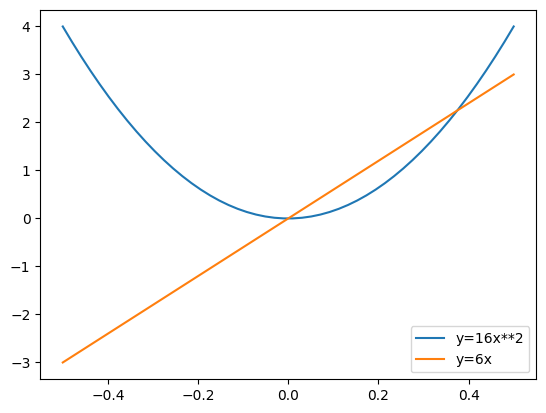

In [2]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-0.5,0.5)
y1 = 16*x**2
y2 = 6*x

plt.plot(x, y1, label="y=16x**2")
plt.plot(x, y2, label="y=6x")
plt.legend()
plt.show()

Podemos ver que si consideramos barrer en y el área, se va de $y=16x^2$ a $y=6x$, y $x$ va de $0$ a $6/16$ (las intersecciones entre las 2 curvas). Entonces podemos reescribir la integral como:
$$
1 = \int_0^{6/16} \int_{16x^2}^{6x} Ky \, dy\, dx.
$$
Integrando la primer integral obtenemos:
$$
1 = \int_0^{6/16} k \left(  18 x^2 - 128 x^4 \right)\, dx,
$$
luego:
$$
1 = k \left[ \frac{18}{3} \left( \frac{6}{16} \right)^2 - \frac{128}{5} \left( \frac{6}{16} \right)^5\right] = k \frac{81}{640},
$$
por lo que obtenemos:
$$
k = \frac{640}{81}.
$$


**Ítem 2.** Para obtener la densidad marginal $f_Y(y)$, buscamos obtener algo de la forma:
$$
1 = \int_{a}^{b} f_Y(y) \,dy.
$$
Si re-expresamos los límites que contienen al función de densidad como función de $y$ obtenemos:
$$
16x^2=y \Longrightarrow x=\pm \sqrt{\frac{y}{16}}, \\
6x =y \Longrightarrow x = \frac{y}{6}.
$$
Entonces, observando el gráfico del ítem anterior podemos decir que la integral en $x$ debe ir de $y/6$ a $\sqrt{y/16}$, por lo que podemos escribir:
$$
1 = \int \int_{y/6}^{\sqrt{y/16}} Ky\,dx\,dy.
$$
Integrando:
$$
1 = \int Ky\,x|_{y/6}^{\sqrt{y/16}}\,dy = \int Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)\,dy.
$$
Y lo que tenemos dentro del integrando es la densidad marginal de $Y$:
$$
f_Y(y) = Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)
$$


**Ítem 3.** Para obtener la densidad condicional $f_{X|Y}(x,y)$ de $X$ dado $Y$, planteamos:
$$
f_{X|Y} = \frac{f_{XY}}{f_{Y}} = \frac{Ky}{Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)}.
$$
Simplificando obtenemos
$$
f_{X|Y}  = \left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)^{-1}.
$$

# Ejercicio 3
**Enunciado.** Don Francisco es un pequeño comerciante de barrio que posee un supermercado, con el que sostiene su familia. Uno de sus hijos, Matı́as, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a don Francisco le parece buena idea.<br>
Don Francisco le entrega a Matı́as el cuaderno donde tiene registrado el valor total de sus ventas en cada dı́a del año. Con esta información, Matı́as construye una tabla en la cual la primera columna corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la inflación. Matı́as no se siente muy seguro de la tarea a realizar, ası́ que les pide ayuda a ustedes para abordar el problema.<br>
A partir del archivo de datos correspondiente a su grupo, determine una función empı́rica de distribución y una aproximación a la función de densidad de las ventas del supermercado de Don Francisco para cada año de registro (2021, 2022 y 2023).

**Resolución.** Comenzamos importante `pandas` y el archivo `xlsx` con la información de las ventas.

In [3]:
import pandas as pd
inputData = pd.read_excel("Datos_primer_TP_23Co2025_a2326.xlsx")

Luego formateamos los valores de las fechas con el paquete `datetime` y convertimos el `DataFrame` original a 3, teniendo por año.

In [6]:
from datetime import datetime

# Formateo de fechas
inputData["Fecha"] = pd.to_datetime(inputData["Fecha"], format='%d/%m/%Y')

# Filtrado por fechas en 3 DataFrames
inputData2021 = inputData[inputData["Fecha"]<datetime(2022,1,1)]
inputData2022 = inputData[(inputData["Fecha"]>=datetime(2022,1,1)) & (inputData["Fecha"]<datetime(2023,1,1))]
inputData2023 = inputData[(inputData["Fecha"]>=datetime(2023,1,1)) & (inputData["Fecha"]<datetime(2024,1,1))]

Ahora, para cada DataFrame, ordenamos de acuerdo al valor de "Ventas" de forma ascendente, y restauramos los índices. Luego definimos la columna "Probabilidad" como el cociente entre el índice y la cantidad total de elementos. Esta columna representa la probabilidad acumulada, es decir de que se tenga un valor de ventas diarias menor o igual.

In [7]:
sortedSales2021 = pd.DataFrame(inputData2021["Ventas"].sort_values()).reset_index(drop=True)
sortedSales2021["Probabilidad"] = sortedSales2021.index / (len(sortedSales2021.index) -1)
sortedSales2022 = pd.DataFrame(inputData2022["Ventas"].sort_values()).reset_index(drop=True)
sortedSales2022["Probabilidad"] = sortedSales2022.index / (len(sortedSales2022.index) -1)
sortedSales2023 = pd.DataFrame(inputData2023["Ventas"].sort_values()).reset_index(drop=True)
sortedSales2023["Probabilidad"] = sortedSales2023.index / (len(sortedSales2023.index) -1)

Ahora podemos graficar la **función empírica de distribución** para cada año:

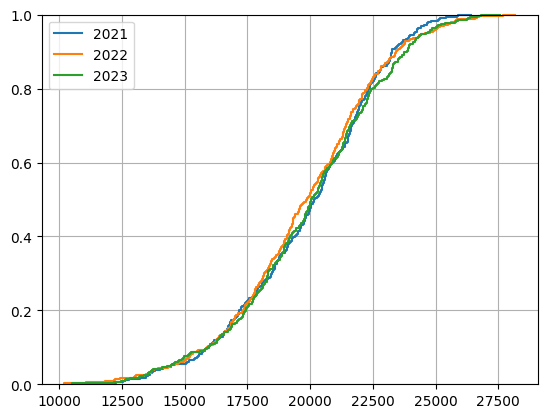

In [15]:
from matplotlib import pyplot as plt

plt.step(sortedSales2021["Ventas"], sortedSales2021["Probabilidad"], label="2021", clip_on=False)
plt.step(sortedSales2022["Ventas"], sortedSales2022["Probabilidad"], label="2022", clip_on=False)
plt.step(sortedSales2023["Ventas"], sortedSales2023["Probabilidad"], label="2023", clip_on=False)
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

Para estimar la función de densidad de cada año, partiremos de estimar su función de distribución y derivarla:
$$
F(x)=\int_{-\inf}^x f_X(x)\,dx
$$
Estimaremos la función de distribución con una función sigmoidea o logística, la cual tiene la forma:
$$
F(x) = \frac{1}{1 + \exp(-(a\,x+b))},
$$
siendo $a$ y $b$ parámetros a optimizar para cada año (aunque viendo la función empírica de distribución, van a ser muy similares dada la similitud de las 3 curvas, por lo que optimizar para un año debería bastar).<br>
Definimos entonces la función sigmoidea:

In [51]:
import numpy as np
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(a * x + b)))

Optimizemos ahora los coeficientes $a$ y $b$ mediante cuadrados mínimos:

a = 0.0005780000000000001
b = -11.600000000000003
minMSE = 0.0005352788594436473


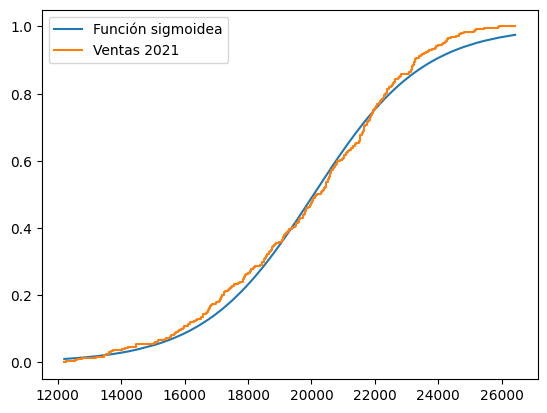

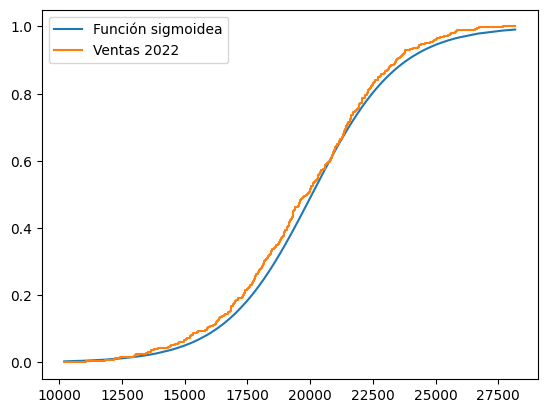

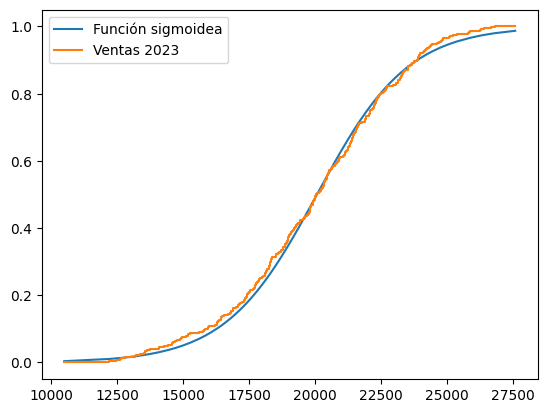

In [55]:
from scipy.stats import poisson

def MSE(ysTrue, ysPredicted):
    mse = 0
    for i in range(len(ysTrue)):
        yTrue = ysTrue[i]
        yPredicted = ysPredicted[i]
        mse += (yTrue - yPredicted)**2
    mse /= len(ysTrue)
    return mse

minimalMSE = 1e1
for a in np.arange(0.000575, 0.000625, 0.000001):
    for b in np.arange(-12.5, -11.5, 0.1):
        sigmoidTest = []
        for venta in sortedSales2021["Ventas"]:
            sigmoidTest.append(sigmoid(venta, a, b))
        if MSE(sortedSales2021["Probabilidad"], sigmoidTest) < minimalMSE:
            minimalMSE = MSE(sortedSales2021["Probabilidad"], sigmoidTest)
            aFinal = a
            bFinal = b

print(f"a = {aFinal}")
print(f"b = {bFinal}")
print(f"minMSE = {minimalMSE}")


sigmoidTest2021 = []
for venta in sortedSales2021["Ventas"]:
    sigmoidTest2021.append(sigmoid(venta, aFinal, bFinal))
sigmoidTest2022 = []
for venta in sortedSales2022["Ventas"]:
    sigmoidTest2022.append(sigmoid(venta, aFinal, bFinal))
sigmoidTest2023 = []
for venta in sortedSales2023["Ventas"]:
    sigmoidTest2023.append(sigmoid(venta, aFinal, bFinal))

plt.plot(sortedSales2021["Ventas"], sigmoidTest2021, label="Función sigmoidea")
plt.step(sortedSales2021["Ventas"], sortedSales2021["Probabilidad"], label="Ventas 2021", clip_on=False)
plt.legend()
plt.show()

plt.plot(sortedSales2022["Ventas"], sigmoidTest2022, label="Función sigmoidea")
plt.step(sortedSales2022["Ventas"], sortedSales2022["Probabilidad"], label="Ventas 2022", clip_on=False)
plt.legend()
plt.show()

plt.plot(sortedSales2023["Ventas"], sigmoidTest2023, label="Función sigmoidea")
plt.step(sortedSales2023["Ventas"], sortedSales2023["Probabilidad"], label="Ventas 2023", clip_on=False)
plt.legend()
plt.show()

Vemos que la función ajusta muy bien para la función de distribución.<br>
Definamos ahora entonces la función de densidad a partir de:
$$
f_X(x)=\frac{d}{dx}F(x) = \frac{d}{dx}\left( \frac{1}{1 + \exp(-(a\,x+b))}\right).
$$
Se obtiene:
$$
f_X(x)=\frac{a\exp[-(a\,x+b)]}{(1+\exp[-(a\,x+b)])^2}.
$$
Grafiquemosla para entre 10.000 y 28.000 ventas:

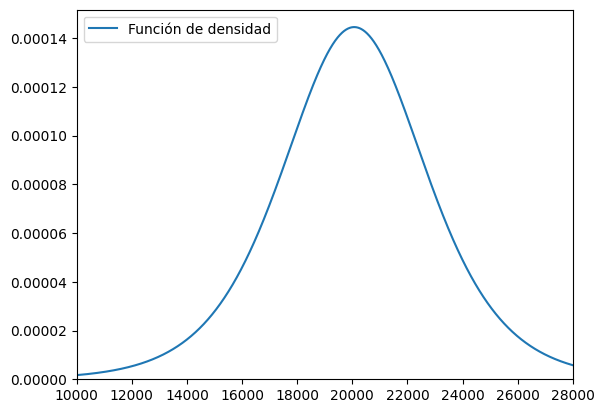

In [56]:
def sigmoidDerivative(x, a, b):
    return np.exp(-(a * x + b)) * a / ((1 + np.exp(-(a * x + b)))**2)

x = np.arange(10000,28000, 10)
y = sigmoidDerivative(x, aFinal, bFinal)
plt.plot(x, y, label="Función de densidad")
plt.ylim(0,None)
plt.xlim(10000,28000)
plt.legend()
plt.show()